In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic['is_male'] = pd.get_dummies(titanic['Sex'] , drop_first = True)

In [4]:
titanic.drop(titanic[titanic['Age'].isnull()].index , axis=0 , inplace = True)

In [5]:
X = titanic[['is_male' , 'Age' , 'Fare']]
Y = titanic['Survived']
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 456)

In [6]:
lr = LogisticRegression()
lr.fit(X_train , Y_train)
print("train accuracy : {}".format(lr.score(X_train , Y_train)))
print("test accuracy  : {}".format(lr.score(X_test , Y_test)))

train accuracy : 0.7758318739054291
test accuracy  : 0.7902097902097902


In [7]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
test_pre_proba = lr.predict_proba(X_test)[:,1]

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
cm_train = confusion_matrix(Y_train , train_predict)
cm_test = confusion_matrix(Y_test , test_predict)

In [10]:
print("train confusion matrix :\n {}".format(cm_train))
print("test confusion matrix : \n {}".format(cm_test))

train confusion matrix :
 [[285  58]
 [ 70 158]]
test confusion matrix : 
 [[71 10]
 [20 42]]


__ACCURACY__

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print("train accuracy : {}".format(accuracy_score(Y_train ,train_predict)))
print("test accuracy  : {}".format(accuracy_score(Y_test ,test_predict)))

train accuracy : 0.7758318739054291
test accuracy  : 0.7902097902097902


__ERROR RATE__

In [13]:
print("train error rate : {}".format(1 - accuracy_score(Y_train ,train_predict)))
print("test error rate  : {}".format(1 - accuracy_score(Y_test ,test_predict)))

train error rate : 0.22416812609457093
test error rate  : 0.2097902097902098


__PRECİSİON__

In [14]:
from sklearn.metrics import precision_score

In [15]:
print("train precision : {}".format(precision_score(Y_train , train_predict)))
print("test precision  : {}".format(precision_score(Y_test , test_predict)))

train precision : 0.7314814814814815
test precision  : 0.8076923076923077


__RECALL__

In [16]:
from sklearn.metrics import recall_score

In [17]:
print("train recall : {}".format(recall_score(Y_train , train_predict)))
print("test recall  : {}".format(recall_score(Y_test , test_predict)))

train recall : 0.6929824561403509
test recall  : 0.6774193548387096


__SPECİFİCİTY__

In [18]:
print("train specificity : {}".format(cm_train[0][0] / (cm_train[0][0] + cm_train[0][1])))
print("test specificity  : {}".format(cm_test[0][0] / (cm_test[0][0] + cm_test[0][1])))

train specificity : 0.8309037900874635
test specificity  : 0.8765432098765432


__F1 SCORE__

In [19]:
from sklearn.metrics import f1_score

In [20]:
print("train f1-score : {}".format(f1_score(Y_train , train_predict)))
print("test f1-score  : {}".format(f1_score(Y_test , test_predict)))

train f1-score : 0.7117117117117118
test f1-score  : 0.7368421052631579


In [21]:
from sklearn.metrics import classification_report

In [22]:
print("TRAİN SET")
print(classification_report(Y_train , train_predict))
print("--" * 27)
print("TEST SET")
print(classification_report(Y_test , test_predict))

TRAİN SET
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       343
           1       0.73      0.69      0.71       228

    accuracy                           0.78       571
   macro avg       0.77      0.76      0.76       571
weighted avg       0.77      0.78      0.77       571

------------------------------------------------------
TEST SET
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        81
           1       0.81      0.68      0.74        62

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



- Plot the ROC and the precision / recall curves for different "c" values.

In [23]:
from sklearn.metrics import roc_curve , roc_auc_score

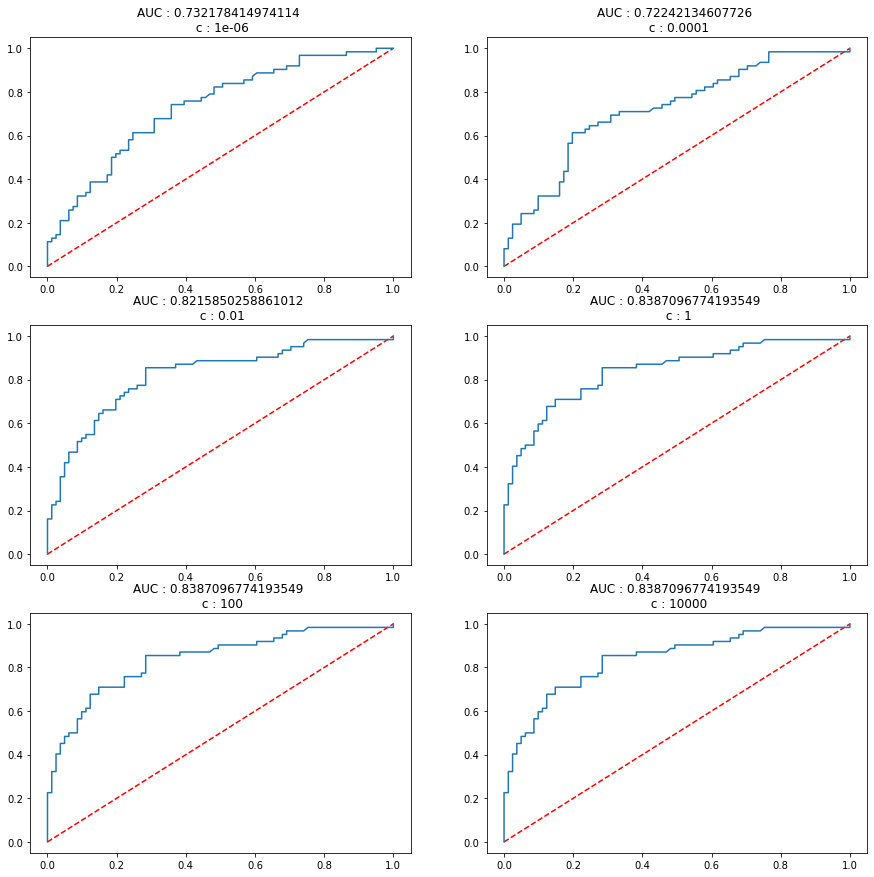

In [24]:
c_values = [10 ** i for i in range(-6,6,2)]
j = 1
plt.figure(figsize=(15,15))
for c in c_values:
        lr = LogisticRegression(C = c , penalty ='l2' , multi_class = 'multinomial' , solver = 'lbfgs' , random_state = 456)
        lr.fit(X_train , Y_train)
        test_prediction_proba = lr.predict_proba(X_test)[:,1]
        fpr , tpr , threshold = roc_curve(Y_test , test_prediction_proba)
        plt.subplot(3,2,j)
        plt.title("AUC : {} \n c : {}".format(roc_auc_score(Y_test , test_prediction_proba),c))
        plt.plot([0,1] , [0,1] , 'k--' , color = 'red')
        plt.plot(fpr , tpr)
        j = j + 1
plt.show()
        

In [25]:
from sklearn.metrics import precision_recall_curve

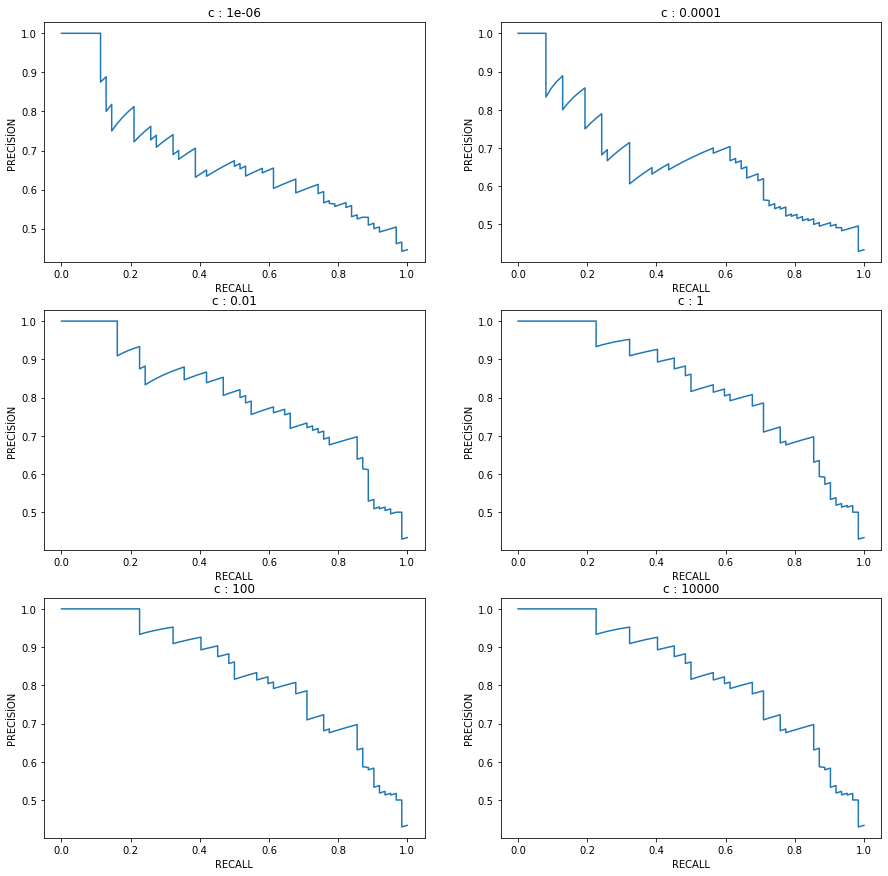

In [26]:
c_values = [10 ** i for i in range(-6,6,2)]
j = 1
plt.figure(figsize=(15,15))
for c in c_values:
        lr = LogisticRegression(C = c , penalty ='l2' , multi_class = 'multinomial' , solver = 'lbfgs' , random_state = 456)
        lr.fit(X_train , Y_train)
        test_prediction_proba = lr.predict_proba(X_test)[:,1]
        precision , recall , _ = precision_recall_curve(Y_test , test_prediction_proba)
        plt.subplot(3,2,j)
        plt.title("c : {}".format(c))
        plt.plot(recall , precision)
        plt.xlabel("RECALL")
        plt.ylabel("PRECİSİON")
        j = j + 1
plt.show()